In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('finance-charts-apple.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           506 non-null    object 
 1   AAPL.Open      506 non-null    float64
 2   AAPL.High      506 non-null    float64
 3   AAPL.Low       506 non-null    float64
 4   AAPL.Close     506 non-null    float64
 5   AAPL.Volume    506 non-null    int64  
 6   AAPL.Adjusted  506 non-null    float64
 7   dn             506 non-null    float64
 8   mavg           506 non-null    float64
 9   up             506 non-null    float64
 10  direction      506 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.6+ KB


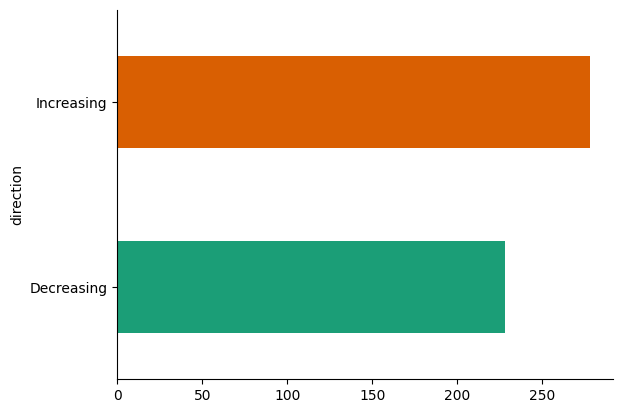

In [4]:
df.groupby('direction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

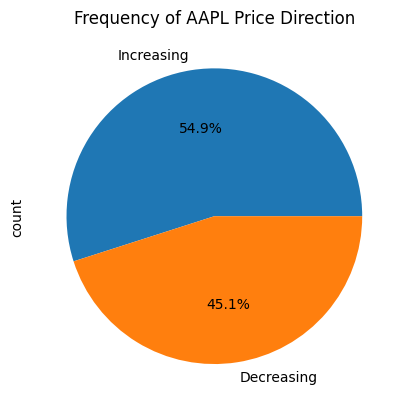

In [5]:
plt.figure()
df['direction'].value_counts().plot(kind='pie', autopct='%1.1f%%')

_ = plt.title('Frequency of AAPL Price Direction')

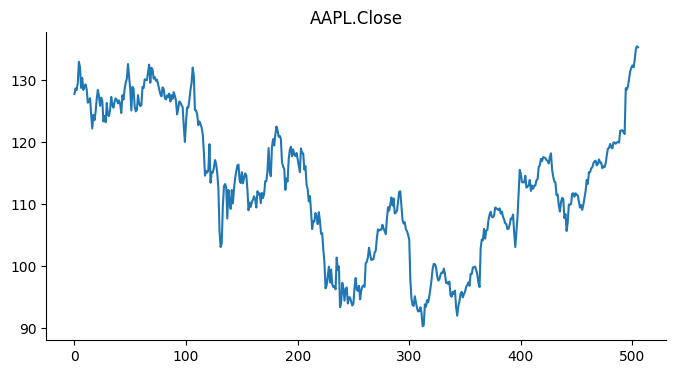

In [6]:
df['AAPL.Close'].plot(kind='line', figsize=(8, 4), title='AAPL.Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
x=df.iloc[:,1:10].values
y=df.iloc[:,10].values

In [8]:
print(x)

[[127.489998  128.880005  126.919998  ... 106.7410523 117.9276669
  129.1142814]
 [127.629997  128.779999  127.449997  ... 107.842423  118.9403335
  130.0382439]
 [128.479996  129.029999  128.330002  ... 108.8942449 119.8891668
  130.8840887]
 ...
 [133.470001  135.089996  133.25      ... 115.1757183 125.9534992
  136.7312801]
 [135.520004  136.270004  134.619995  ... 115.5450349 126.7234992
  137.9019634]
 [135.669998  135.899994  134.839996  ... 116.2032988 127.5043325
  138.8053662]]


In [9]:
print(y)
y.dtype

['Increasing' 'Increasing' 'Decreasing' 'Increasing' 'Increasing'
 'Decreasing' 'Decreasing' 'Increasing' 'Decreasing' 'Decreasing'
 'Increasing' 'Decreasing' 'Decreasing' 'Decreasing' 'Decreasing'
 'Decreasing' 'Decreasing' 'Increasing' 'Decreasing' 'Increasing'
 'Increasing' 'Increasing' 'Decreasing' 'Decreasing' 'Increasing'
 'Decreasing' 'Decreasing' 'Increasing' 'Decreasing' 'Increasing'
 'Decreasing' 'Decreasing' 'Increasing' 'Increasing' 'Decreasing'
 'Decreasing' 'Increasing' 'Increasing' 'Decreasing' 'Decreasing'
 'Increasing' 'Decreasing' 'Decreasing' 'Increasing' 'Decreasing'
 'Increasing' 'Increasing' 'Decreasing' 'Increasing' 'Decreasing'
 'Decreasing' 'Decreasing' 'Increasing' 'Decreasing' 'Decreasing'
 'Decreasing' 'Increasing' 'Increasing' 'Decreasing' 'Increasing'
 'Decreasing' 'Increasing' 'Decreasing' 'Increasing' 'Decreasing'
 'Increasing' 'Increasing' 'Increasing' 'Decreasing' 'Increasing'
 'Decreasing' 'Decreasing' 'Increasing' 'Increasing' 'Decreasing'
 'Decreasi

dtype('O')

In [10]:
import numpy as np

def convert_direction(direction_array):
    """
    Convert a NumPy array of stock movement directions to binary values.
    'increasing' -> 1
    'decreasing' -> 0

    Parameters:
    direction_array (np.array): NumPy array containing stock movement directions as strings

    Returns:
    np.array: NumPy array with binary values (1 for increasing, 0 for decreasing)
    """
    # Create a mapping from direction string to binary value
    direction_mapping = {'Increasing': 1, 'Decreasing': 0}

    # Vectorized conversion using NumPy
    binary_array = np.vectorize(direction_mapping.get)(direction_array)

    return binary_array

y = convert_direction(y)
print(y)


[1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

print(x_train, x_test)

[[-1.48550785 -1.54049746 -1.65379553 ... -1.26213645 -1.46388084
  -1.60030572]
 [ 1.13072093  1.1608057   1.14804408 ...  1.44906521  1.39546499
   1.26910057]
 [-0.70009918 -0.60550003 -0.61694407 ... -1.10232668 -1.03378574
  -0.91010898]
 ...
 [ 0.39479415  0.33310331  0.10669212 ...  0.83675897  1.088974
   1.29695815]
 [ 1.57065822  1.49892015  1.54496352 ...  1.43082615  1.28047045
   1.05902799]
 [ 0.08710856  0.1419568   0.14719387 ...  0.06450213 -0.11969346
  -0.30570689]] [[-1.14115222 -1.18159974 -1.08215999 ... -1.57886758 -1.6116509
  -1.54145766]
 [-0.54315631 -0.51508634 -0.46286235 ... -1.19202698 -1.13597666
  -1.00489781]
 [-0.48437873 -0.3625937  -0.40453507 ... -0.30797712 -0.04004958
   0.23873848]
 ...
 [-1.67355622 -1.70418794 -1.62854881 ... -1.81516706 -1.06543067
  -0.22378944]
 [ 0.28909796  0.23452716  0.25421912 ...  0.26713074  0.81666998
   1.33049032]
 [-1.48615027 -1.52171017 -1.52304487 ... -1.4624376  -0.83030996
  -0.12508126]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_p=classifier.predict(x_test)
print(y_p)

[0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0]


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_p,y_test)
print(cm)

[[26 23]
 [29 49]]


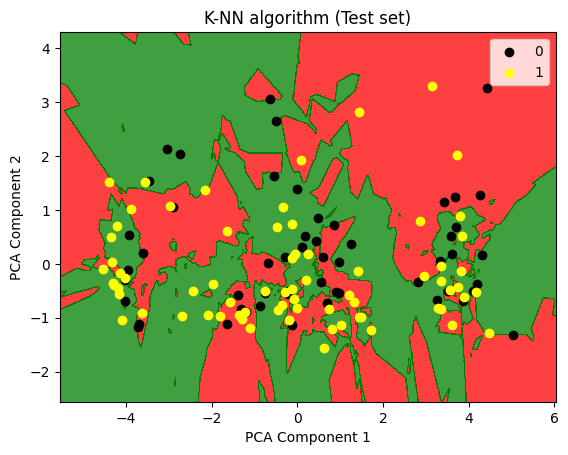

In [16]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

# Visualize the decision boundary on the PCA-reduced test set
x_set, y_set = X_test_pca, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

grid_points = np.array([x1.ravel(), x2.ravel()]).T
grid_points_original_space = pca.inverse_transform(grid_points)
predictions = classifier.predict(grid_points_original_space).reshape(x1.shape)

plt.contourf(x1, x2, predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    colors = ('black', 'yellow')
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            color=colors[i], label=j)


plt.title('K-NN algorithm (Test set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
